## Problem: Word Search
LeetCode : 79. Word Search

https://leetcode.com/problems/word-search/

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

 

Example 1:

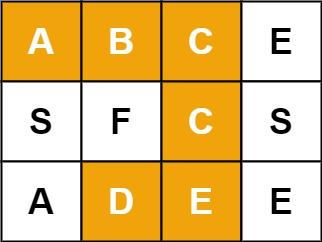

    Input: board = [["A","B","C","E"],
                    ["S","F","C","S"],
                    ["A","D","E","E"]]
           word = "ABCCED"
    Output: true
Example 2:


    Input: board = [["A","B","C","E"],
                    ["S","F","C","S"],
                    ["A","D","E","E"]]
           word = "SEE"
    Output: true
Example 3:


    Input: board = [["A","B","C","E"],
                    ["S","F","C","S"],
                    ["A","D","E","E"]]
           word = "ABCB"
    Output: false
 

Constraints:

    m == board.length
    n = board[i].length
    1 <= m, n <= 6
    1 <= word.length <= 15
    board and word consists of only lowercase and uppercase English letters.


### Approach:
Compare the word at index say wIndex (starting from 0), with cell(i,j) (starting from 0,0). If it matches, compare with the letter in word at wIndex+1 with neighbouring cells. If one of the neighbouring cell matches to the letter, then go with next letter and compare with neighbouring cell and so on till all letters exhusted(wIndex == len(word)).
Mark the cells as visited, while going to the neighbouring cells. 

There are two conditions:
1. If down the line if one of cell's neighbouring cell does not match the letter, then return False. Since all calls are recurssive, then it will check next neighbour cell. Also, mark the cell unvisited while returing back  with False. So that this cell can be considered via another path.

2. If parent cell say (i=0, j = 0) does not have same letter at word[wIndex], then move to the next cell (i, j+1)

Return False, if we exhusted all cells.

In [39]:
def wordSearch(board, word):
    n = len(board)
    m = len(board[0])
    visited = [[False]*m for _ in range(n)]
    wordIndex = 0
    for i in range(n):
        for j in range(m):
            if search(board, word, wordIndex, i, j, visited):
                return True
    return False

def search(board, word, wIndex, row, col, visited):
    if wIndex == len(word):
        return True
    if visited[row][col]:
        return False
    visited[row][col] = True
    if word[wIndex] == board[row][col]:
        if wIndex + 1 == len(word):
            return True
        nbrs = getNebrs(row, col, board)
        for nr,nc in nbrs:
            if search(board, word, wIndex + 1, nr, nc, visited):
                return True
    visited[row][col] = False  
    return False
    
def getNebrs(row, col, board):
    retVal = []
    if row > 0:
        retVal.append((row-1, col))
    if row < len(board)-1:
        retVal.append((row+1, col))
    if col > 0:
        retVal.append((row, col-1))
    if col < len(board[0])-1:
        retVal.append((row, col+1))
    return retVal
            
                

In [40]:
board = [["A","B","C","E"],
        ["S","F","C","S"],
        ["A","D","E","E"]]
word = "SEE"
wordSearch(board, word)

True

In [41]:
board = [["A","B","C","E"],
        ["S","F","C","S"],
        ["A","D","E","E"]]
word = "ABCCED"
wordSearch(board, word)

True

In [42]:
board = [["A","B","C","E"],
        ["S","F","C","S"],
        ["A","D","E","E"]]
word = "ABCB"
wordSearch(board, word)

False

In [43]:
board = [["B"],
        ["A"],
        ["B"],
        ["B"],
        ["A"]]
word = "BAA"
wordSearch(board, word)

False

In [44]:
board = ["A"]
word = "A"
wordSearch(board, word)

True